In [1]:
import numpy as np
import pandas as pd
import imageio
import h5py

from tqdm import tqdm
from xqdm import xqdm
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
dataset_dir = Path('data')

In [29]:
csv_files = sorted(list(dataset_dir.glob('*.csv')))

In [30]:
csv = pd.read_csv(csv_files[0])

In [31]:
csv.sample(10)

,timestamp,acceleration_x,acceleration_y,acceleration_z,angular_vec_x,angular_vec_y,angular_vec_z,input_orientation_x,input_orientation_y,input_orientation_z,input_orientation_w,input_orientation_yaw,input_orientation_pitch,input_orientation_roll
18072,1233538249567,-0.026337,9.572310,-2.332024,-0.005238,-0.171260,0.005869,0.126696,0.039937,-0.018121,0.990972,0.083871,0.255403,-0.025798
5200,1081529193936,-0.311256,9.651321,0.445335,0.276982,0.236798,-0.021009,0.001690,-0.096408,-0.021031,0.995118,-0.193174,-0.000692,-0.042195
3238,1058359430445,-0.076617,9.373586,-2.296109,0.077840,0.024217,-0.027118,0.139506,0.017092,-0.008643,0.990036,0.036266,0.280201,-0.012346
14246,1188358274956,0.040703,9.646533,1.347977,0.006368,-0.027096,-0.011846,-0.057547,-0.104583,-0.007280,0.992823,-0.210045,-0.116051,-0.002419
19235,1247272144542,0.486038,9.493299,2.142876,0.020418,-0.009381,-0.014900,-0.097806,0.056665,0.021534,0.993357,0.117116,-0.198147,0.031703
20009,1256413680486,0.313650,9.608225,1.613741,0.013088,-0.038703,-0.000239,-0.072372,0.033616,0.008002,0.996779,0.068230,-0.145336,0.011088
10537,1144556995714,0.146051,9.040782,-3.591412,-0.118859,-0.008159,-0.020398,0.190914,0.019213,-0.006472,0.981397,0.040194,0.384374,-0.005367
1608,1039111248025,0.411815,9.624985,2.083019,0.024083,-0.112617,-0.035059,-0.093887,0.009391,0.019295,0.995351,0.022335,-0.188504,0.036656
18428,1237742461459,-0.122108,9.670476,-1.417411,0.013088,-0.000829,-0.006959,0.082490,0.011221,-0.014385,0.996425,0.024747,0.165527,-0.026818
12945,1172994206465,0.351958,9.591465,-2.035134,-0.006460,-0.042979,-0.015511,0.117183,0.092696,-0.003820,0.988768,0.185281,0.234610,0.014171


In [32]:
csv.columns

Index(['timestamp', 'acceleration_x', 'acceleration_y', 'acceleration_z',
       'angular_vec_x', 'angular_vec_y', 'angular_vec_z',
       'input_orientation_x', 'input_orientation_y', 'input_orientation_z',
       'input_orientation_w', 'input_orientation_yaw',
       'input_orientation_pitch', 'input_orientation_roll'],
      dtype='object')

In [33]:
using_columns = ['timestamp',
                 'acceleration_x', 'acceleration_y', 'acceleration_z',
                 'angular_vec_x', 'angular_vec_y', 'angular_vec_z',
                 'input_orientation_x', 'input_orientation_y', 'input_orientation_z', 'input_orientation_w',
                 'input_orientation_yaw', 'input_orientation_pitch', 'input_orientation_roll']

In [34]:
csv[using_columns]

,timestamp,acceleration_x,acceleration_y,acceleration_z,angular_vec_x,angular_vec_y,angular_vec_z,input_orientation_x,input_orientation_y,input_orientation_z,input_orientation_w,input_orientation_yaw,input_orientation_pitch,input_orientation_roll
0,1020121340878,0.591386,9.818921,-0.787716,-0.007071,0.003447,-0.002072,0.051709,0.054229,0.016040,0.997060,0.106758,0.101622,0.037603
1,1020132461270,0.608146,9.888355,-0.790111,0.010644,-0.003272,-0.008181,0.052218,0.054409,0.015941,0.997025,0.107109,0.102643,0.037477
2,1020144070452,0.615329,9.794978,-0.785322,0.012477,-0.005716,-0.013678,0.052375,0.054243,0.015685,0.997030,0.106797,0.102989,0.036967
3,1020157724844,0.598569,9.656111,-0.797293,0.006979,-0.008770,-0.010013,0.052422,0.054175,0.015814,0.997029,0.106645,0.103073,0.037223
4,1020167986249,0.600963,9.708784,-0.792505,-0.000351,-0.011825,-0.009402,0.051975,0.053943,0.015799,0.997065,0.106200,0.102188,0.037121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20416,1261219265542,-0.256187,9.476540,-2.581028,0.029581,0.015664,-0.000239,0.143662,0.003701,-0.021762,0.989381,0.013588,0.288679,-0.042011
20417,1261231477198,-0.256187,9.478934,-2.554691,0.031414,0.016886,-0.002072,0.144229,0.003863,-0.022062,0.989291,0.014021,0.289840,-0.042550
20418,1261245585752,-0.237033,9.447808,-2.588211,0.033246,0.019330,-0.004516,0.144372,0.004321,-0.022014,0.989269,0.014920,0.290146,-0.042320
20419,1261255795567,-0.251399,9.462174,-2.590605,0.034468,0.024827,-0.009402,0.144634,0.004657,-0.022233,0.989224,0.015659,0.290695,-0.042652


In [35]:
len(using_columns)

14

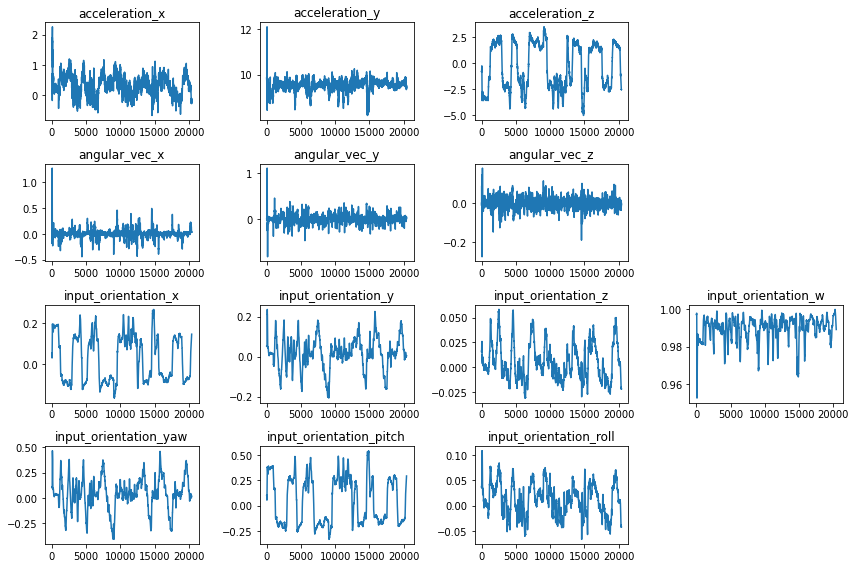

In [36]:
plt.figure(figsize=(12, 8))

for i in range(3):
    plt.subplot(4, 4, i+1)
    plt.plot(csv[using_columns[i+1]])
    plt.title(using_columns[i+1])
for i in range(3):
    plt.subplot(4, 4, i+5)
    plt.plot(csv[using_columns[i+4]])
    plt.title(using_columns[i+4])
for i in range(4):
    plt.subplot(4, 4, i+9)
    plt.plot(csv[using_columns[i+7]])
    plt.title(using_columns[i+7])
for i in range(3):
    plt.subplot(4, 4, i+13)
    plt.plot(csv[using_columns[i+11]])
    plt.title(using_columns[i+11])

plt.tight_layout()
plt.show()

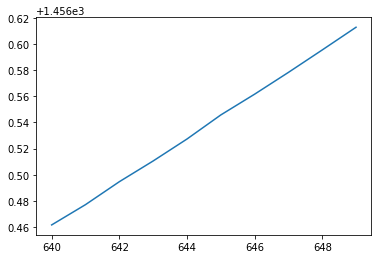

In [37]:
plt.plot(csv['timestamp'][640:650] / 705600000)

In [38]:
T = csv['timestamp']
t_diff = [T[i+1]-T[i] for i in range(len(T)-1)]

In [39]:
for i in range(len(t_diff)):
    if t_diff[i] == 38723342274:
        del t_diff[i]
        break

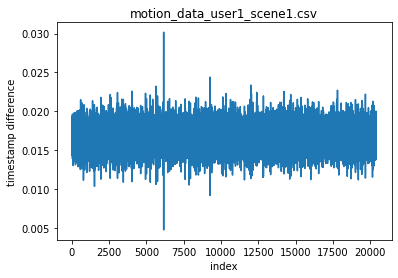

In [42]:
plt.plot(np.array(t_diff) / 705600000)
plt.xlabel('index')
plt.ylabel('timestamp difference')
plt.title('motion_data_user1_scene1.csv')
plt.show()

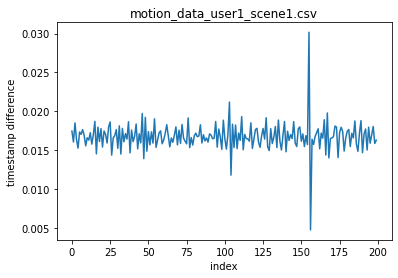

In [45]:
plt.plot(np.array(t_diff)[6000:6200] / 705600000)
plt.xlabel('index')
plt.ylabel('timestamp difference')
plt.title('motion_data_user1_scene1.csv')
plt.show()